In [9]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

## Analisis Exploratorio de Datos: Tricafone
Realizaremos un análisis de datos sobre un conjunto de eventos de web analytics de usuarios que visitaron www.trocafone.com, su plataforma de ecommerce de Brasil. Trocafone es un side to side Marketplace para la compra y venta de dispositivos electrónicos que se encuentra actualmente operando en Brasil y Argentina.

Este set de datos posee informacion de al rededor de 1000000 de eventos de Trocafone. Nuestro objetivo será realizar un análisis exploratorio sobre esa información, para intentar obtener algunos insights de de la misma.

In [114]:
eventos_2018 = pd.read_csv('./events.csv')

In [115]:
print(eventos_2018.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

## Analizando propiedades especificas del set de datos
Para poder comenzar a orientar nuestro analisis comenzaremos a analizar algunas variables que nos interesan para aplicar en nuestros analisis. Comenzaremos con los tipos de eventos.

De esta forma obtenemos la cantidad de valores que hay para cada uno de los tipos de evento.

In [116]:
eventos_principales = eventos_2018['event']
eventos_principales.value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [117]:
#analizo la columna timestamp para entender su uso en el data set.
eventos_2018['timestamp'].head()

0    2018-05-31 23:38:05
1    2018-05-31 23:38:05
2    2018-05-31 23:38:09
3    2018-05-31 23:38:40
4    2018-05-29 13:29:25
Name: timestamp, dtype: object

In [118]:
# Dado que es de tipo 'objeto' creo una nueva columna copiando la informacion de la columna 'timestamp'
# y pasandola a tipo de dato 'datetime'.

eventos_2018['event_datetime'] = pd.to_datetime(eventos_2018['timestamp'])
# Creo una nueva columna obteniendo el mes, esto los usuaremos en visualizacion.
eventos_2018['month'] = eventos_2018['event_datetime'].dt.month

In [119]:
eventos_2018['month'].value_counts()

5    474949
6    281882
4    130008
3     77293
2     27886
1     19270
Name: month, dtype: int64

## Verificacion de Calidad de Datos

Verifico la cantidad de valores nulos.

In [120]:
eventos_2018.isnull().sum()

timestamp                         0
event                             0
person                            0
url                          928532
sku                          447450
model                        447004
condition                    447452
storage                      447452
color                        447452
skus                         789589
search_term                  962321
staticpage                  1007690
campaign_source              928492
search_engine                960331
channel                      923910
new_vs_returning             923910
city                         923910
region                       923910
country                      923910
device_type                  923910
screen_resolution            923910
operating_system_version     923910
browser_version              923910
event_datetime                    0
month                             0
dtype: int64

Se puede observar que gran parte de las columnas son en su mayoria datos nulos, sin embargo esto no es razon suficiente para descartarlas (las columnas), ya que si analisamos un poco los datos, se puede ver que no todos los eventos guardan la misma informacion.
Por lo tanto habra que relacionar los datos, posiblemente a traves de merge  o joins de diferentes tablas.

## Linea Temporal

Veo entre que fechas exactas ocurren los eventos del dataset.

In [121]:
eventos_2018['event_datetime'].agg({'event_datetime':['min','max']})

event_datetime  min   2018-01-01 07:32:26
                max   2018-06-15 23:59:31
Name: event_datetime, dtype: datetime64[ns]

Aca puedo ver que los eventos ocurren durante los primeros 6 meses del 2018, pero del mes 6 (Junio) solo estan los primeros 16 dias, por lo que tengo la mitad de la informacion a comparacion de los otros meses.

## Agrupamiento (Group By) para agregacion, filtrado y transformacion

In [122]:
grouped_events_per_month = eventos_2018.groupby(['month']).agg({'event':['count']})

In [123]:
 grouped_events_per_month.head(20)

,event
,count
month,
1,19270
2,27886
3,77293
4,130008
5,474949
6,281882


In [124]:
# agrupando usando multiples columnas
grouped_events_types_per_month = eventos_2018.groupby(['month','event']).agg({'event':['count']})

In [125]:
# grouped_events_types_per_month.head(20)

In [126]:
# .reset_index(inplace=True)
# .columns = ['year', 'backers_sum', 'pledged_mean', 'pledge_sum']

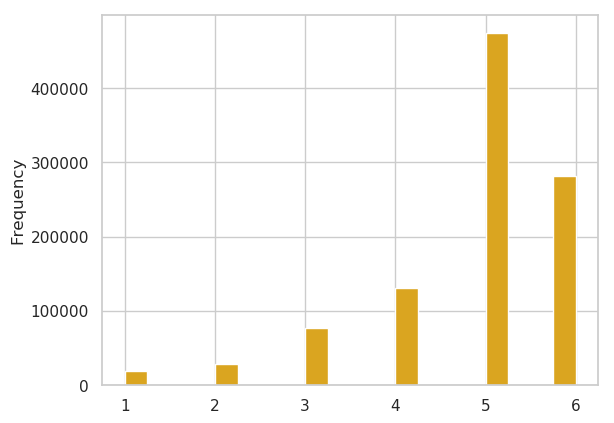

In [128]:
g = eventos_2018["month"].plot.hist(bins=20, color='goldenrod')
g